In [1]:
import pandas as pd

In [4]:
results_df = pd.read_excel('data/Class2022_scraped_employers.xlsx', sheet_name='Sheet1')
employers_df = pd.read_excel('data/Class2022_scraped_employers.xlsx', sheet_name='Sheet4')

In [4]:
available_users = results_df[~results_df['ALL SOURCES: Primary Status'].isnull()]
available_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 2871
Columns: 112 entries, Name to Scraped
dtypes: datetime64[ns](3), float64(13), int64(1), object(95)
memory usage: 1.4+ MB


In [7]:
available_users['ALL SOURCES: Primary Status'].value_counts()

Employed                                           1141
Unemployed and seeking employment                   221
No data                                             208
Enrolled/Accepted in further education               74
Seeking additional education (not yet accepted)      18
Unemployed and not seeking employment                12
Freelance Business                                    1
Enrolled                                              1
Solely engaged in military service                    1
Name: ALL SOURCES: Primary Status, dtype: int64

In [11]:
available_users[available_users['ALL SOURCES: Primary Status']=='Enrolled/Accepted in further education'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 293 to 2799
Columns: 112 entries, Name to Scraped
dtypes: datetime64[ns](3), float64(13), int64(1), object(95)
memory usage: 65.3+ KB


In [14]:
available_users[~available_users['ALL SOURCES: Further Educ Institutions'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 10 to 2799
Columns: 112 entries, Name to Scraped
dtypes: datetime64[ns](3), float64(13), int64(1), object(95)
memory usage: 105.1+ KB


# Employers Ranking

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = results_df.merge(employers_df, how='left', left_on='PrimaryEmail', right_on='Person').drop(columns='Person')
# Replace the elements of the Employer column with the values of the Company column
df['ALL SOURCES: Employer/Organization Name'] = df.apply(lambda row: row['Company / Employer'] if pd.notnull(row['Company / Employer']) else row['ALL SOURCES: Employer/Organization Name'], axis=1)

In [21]:
employer_counts = df['ALL SOURCES: Employer/Organization Name'].value_counts()
#employer_counts.to_excel('Employers_freq.xlsx')

ALL SOURCES: Employer/Organization Name
Not reported                     63
The New School                   27
Self-employed                     9
Calvin Klein                      6
Parsons School of Design          5
                                 ..
Paper Source                      1
Greenwich St. Jewelers            1
Yellow House Architects, PLLC     1
Alldus                            1
OpenTent                          1
Name: count, Length: 969, dtype: int64

In [18]:
employer_counts.head(14)

ALL SOURCES: Employer/Organization Name
Not reported                63
The New School              27
Self-employed                9
Calvin Klein                 6
Parsons School of Design     5
Freelance                    4
The New Historia             3
Proenza Schouler             3
Therapists of New York       3
CUNY                         3
Amazon                       3
Vanguard                     2
FOUNDRAE FINE JEWELRY        2
Stuart Weitzman              2
Name: count, dtype: int64

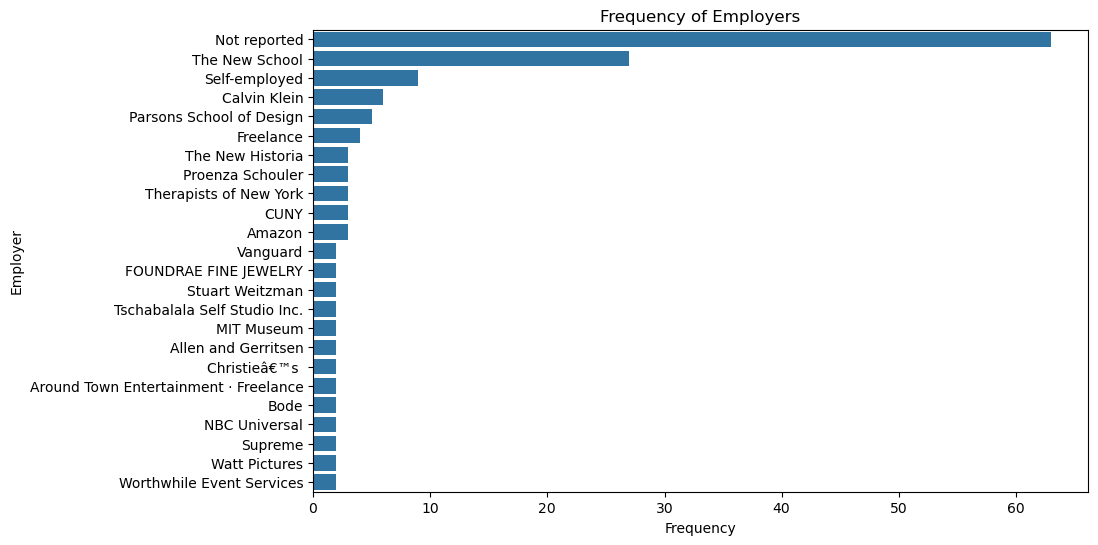

In [19]:
# Count frequency of each employer
employer_counts = df['ALL SOURCES: Employer/Organization Name'].value_counts().reset_index().head(24)
employer_counts.columns = ['Employer', 'Frequency']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Employer', data=employer_counts)
plt.title('Frequency of Employers')
plt.xlabel('Frequency')
plt.ylabel('Employer')
plt.show()

### Grouping by collage

In [29]:
from collections import Counter

grouped_df = df.groupby('Primary College').agg({'ALL SOURCES: Employer/Organization Name': lambda x: Counter(list(x))})
grouped_df

,ALL SOURCES: Employer/Organization Name
Primary College,
College of Performing Arts,"{nan: 175, 'Mannes School of Music at The New ..."
Eugene Lang College Lib Arts,"{'(Not specified)': 1, 'S.E.O.E. Design Lab': ..."
New School for Social Research,"{nan: 131, 'Sage Automotive Interiors': 1, 'Ag..."
Parsons Paris,"{'Major Food Group': 1, nan: 19, 'Beautypest I..."
Parsons School of Design,"{nan: 858, 'Self-employed': 4, 'Sara Story Des..."
Schools of Public Engagement,"{'Bank of America': 1, 'Storyline': 1, 'Eliza ..."


In [52]:
performing_arts_df = pd.DataFrame(list(dict(grouped_df.iloc[0]['ALL SOURCES: Employer/Organization Name']).items()), columns=['Index', 'Count']).set_index('Index', inplace=False).sort_values(by='Count', ascending=False)
lang_df = pd.DataFrame(list(dict(grouped_df.iloc[1]['ALL SOURCES: Employer/Organization Name']).items()), columns=['Index', 'Count']).set_index('Index', inplace=False).sort_values(by='Count', ascending=False)
nssr_df = pd.DataFrame(list(dict(grouped_df.iloc[2]['ALL SOURCES: Employer/Organization Name']).items()), columns=['Index', 'Count']).set_index('Index', inplace=False).sort_values(by='Count', ascending=False)
paris_df = pd.DataFrame(list(dict(grouped_df.iloc[3]['ALL SOURCES: Employer/Organization Name']).items()), columns=['Index', 'Count']).set_index('Index', inplace=False).sort_values(by='Count', ascending=False)
parsons_df = pd.DataFrame(list(dict(grouped_df.iloc[4]['ALL SOURCES: Employer/Organization Name']).items()), columns=['Index', 'Count']).set_index('Index', inplace=False).sort_values(by='Count', ascending=False)
spe_df = pd.DataFrame(list(dict(grouped_df.iloc[5]['ALL SOURCES: Employer/Organization Name']).items()), columns=['Index', 'Count']).set_index('Index', inplace=False).sort_values(by='Count', ascending=False)

In [60]:
ranking_dict = {
    'College of Performing Arts': performing_arts_df,
    'Eugene Lang College Lib Arts': lang_df,
    'New School for Social Research': nssr_df,
    'Parsons Paris': paris_df,
    'Parsons School of Design': parsons_df,
    'Schools of Public Engagement': spe_df
}

In [72]:
list(ranking_dict.items())[4]

('Parsons School of Design',
                           Count
 Index                          
 NaN                         858
 Not reported                 27
 The New School                8
 Calvin Klein                  6
 Parsons School of Design      5
 ...                         ...
 Marchesa                      1
 Madewell                      1
 Gia Kuan Consulting           1
 KHAITE                        1
 Hairstory                     1
 
 [584 rows x 1 columns])

In [77]:
# Create a Pandas Excel writer using ExcelWriter
with pd.ExcelWriter('employers_by_college.xlsx') as writer:
    # Iterate over the dictionary items
    for sheet_name, df in ranking_dict.items():
        # Write each DataFrame to a separate sheet
        df.to_excel(writer, sheet_name=sheet_name, index=True)